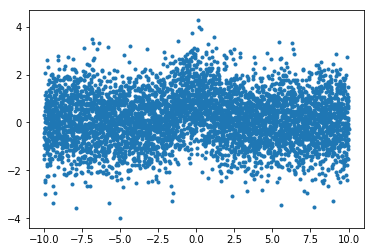

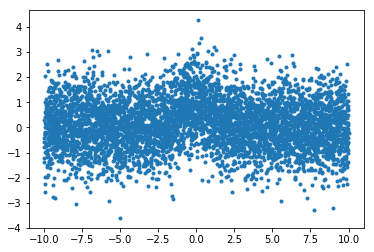

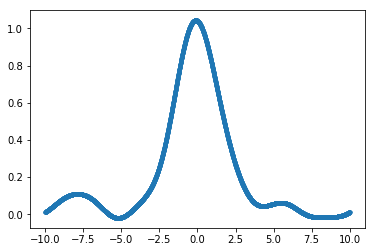

In [13]:
import numpy as np
from matplotlib import pyplot as plt 

plt.ion()

n      = 5000
x      = np.linspace(-10, 10, n)
y_true = np.exp(-0.5*x**2)            # true amplitude 
sigma  = 1 + 0.1*np.random.rand(len(x)) # true noise 

y = y_true + sigma*np.random.randn(len(x))

Ninv = 1/sigma**2 # vector (?) 
Ninv_d = Ninv*y         

template      = np.fft.fftshift(y_true)

Ninv_d_ft        = np.fft.rfft(Ninv_d)
template_ft      = np.fft.rfft(template)
template_sqrd_ft = np.fft.rfft(template**2)
Ninv_ft          = np.fft.rfft(Ninv)

top = np.fft.irfft(Ninv_d_ft*np.conj(template_ft))
bot = np.fft.irfft(Ninv_ft*np.conj(template_sqrd_ft))
amp = top/bot

snr = top/np.sqrt(bot) 

plt.clf()
plt.plot(x, y, ".")
plt.show()   

plt.clf()
plt.plot(x, Ninv_d, ".")
plt.show()

plt.clf()
plt.plot(x, amp, ".")
plt.show()


